# Import Dependencies and Dataset
#### created by Martin Straußberger

In [1]:
from keras.datasets import imdb

/home/mskeegan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
print(train_data[0])
print(train_labels[0])
print(train_labels[1])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
0


In [4]:
print(train_labels[0])
print(train_labels[1]) ## only plain arrays and not numpy arrays

1
0


In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]] ## 3 is safed for ,. etc.
)
print(decode_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


-----------------------------------

# Import Numpy

In [7]:
import numpy as np

## 10000 length of the input vectors and words we insert before
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    # loop sequences
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(train_data.shape, x_train.shape)
print(x_train[0])

(25000,) (25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


Every number stands for a word in the vocabulary [0. 1. 1. ... 0. 0. 0.] 
Ordering is kind of essential to count words with information, instead of zeros

In [8]:
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")
print(y_train[0:10])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


----------

# Now, its time to Create the Model

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
# DENSE = fully conacted Layer
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
# hidden layers is not layer of input nor ouput
model.add(layers.Dense(16, activation="relu"))
# sigmoid function numbers between 0 and 1 / numbers we create always between 0 and 1 / makes connection if it´s binnary classification
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# Recompile it!
This Algorithm is used to change the Number within the NN

In [10]:
model.compile(
    optimizer="rmsprop",
    # loss function is used by optimizer and does how much the net can still learn / loss gets smaller in train / till it merges to zero
    # binary prediciton = binary_crossentropy!
    loss="binary_crossentropy",
    # percentage of predictions which are right! How good is the NN in generalizing!
    metrics=["accuracy"]
)

One Way of Compiling the NN-Model

# Further Way

In [11]:
#from keras import losses # all losses will be included to optimize the metrics
#from keras import optimizers
#from keras import metrics

#model.compile(
    # lr is the learning rate
    # NN Optimizer trys to find the global minima!
    # learning-rate = how big the training steps are -> Gradient Graph (if to display in picture)
    # if step is to small land up in a local minima = quite stupid / if step is to big you might never find a optimia at all
 #   optimizer=optimizers.RMSprop(lr=0.001),
 #   loss=losses.binary_crossentropy,
 #   metrcis=[metrics.binary_accuracy]
#)

# Use the Test-Set and then Change something about the Training (leaking)

Use in between the validation-set! Take hole dataset and cut it into 3 slices Training-Set, Validation-Set (after every epoch, till you confident that it is good), Test-Set

In [12]:
# Rule of Thumb: 10% for Validation, 20 % for Testing, Rest for Training
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print(x_val.shape, partial_x_train.shape, x_test.shape)
print(y_val.shape, partial_y_train.shape, y_test.shape)

(10000, 10000) (15000, 10000) (25000, 10000)
(10000,) (15000,) (25000,)


# Training

In [16]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=15,
    batch_size=1000,
    validation_data = (x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 2s 151us/step - loss: 0.1384 - acc: 0.9585 - val_loss: 0.2803 - val_acc: 0.8894
Epoch 2/15
15000/15000 [==============================] - 2s 131us/step - loss: 0.1297 - acc: 0.9587 - val_loss: 0.2846 - val_acc: 0.8893
Epoch 3/15
15000/15000 [==============================] - 2s 132us/step - loss: 0.1166 - acc: 0.9646 - val_loss: 0.2956 - val_acc: 0.8847
Epoch 4/15
15000/15000 [==============================] - 2s 133us/step - loss: 0.0998 - acc: 0.9712 - val_loss: 0.3317 - val_acc: 0.8772
Epoch 5/15
15000/15000 [==============================] - 2s 132us/step - loss: 0.0871 - acc: 0.9761 - val_loss: 0.3900 - val_acc: 0.8609
Epoch 6/15
15000/15000 [==============================] - 2s 133us/step - loss: 0.0738 - acc: 0.9821 - val_loss: 0.3249 - val_acc: 0.8810
Epoch 7/15
15000/15000 [==============================] - 2s 134us/step - loss: 0.0736 - acc: 0.9799 - val_loss: 0.3361 - 

-----------------------

# Evaluate Training:

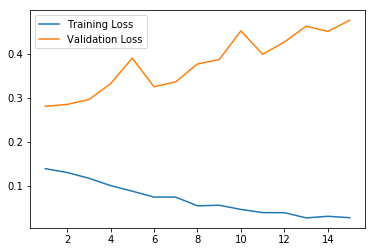

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label="Training Loss")
plt.plot(epochs, val_loss_values, label = "Validation Loss")
plt.legend()
plt.show()

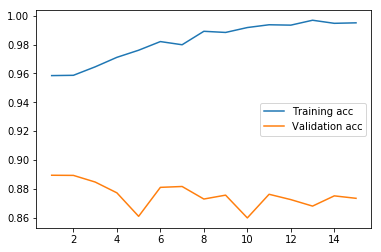

In [18]:
plt.clf()

acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, label="Training acc")
plt.plot(epochs, val_acc_values, label = "Validation acc")
plt.legend()
plt.show()

### How to overcome Overfitting
use Dropouts


-------------------------